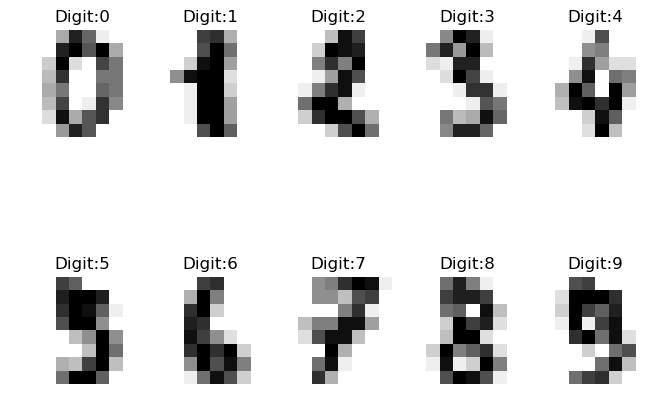

shape of raw image data:(1797, 8, 8)
shape of raw image data:(1797, 64)
0.9777777777777777
1.0


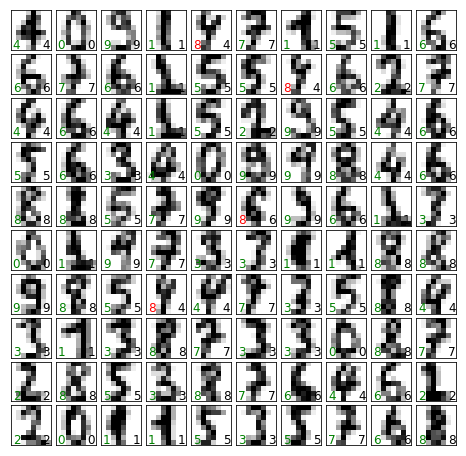

In [24]:
# 若在notebook中调用，则需要将下一条命令放开
%matplotlib inline
# -----------------------------------------
# 目前问题，该代码不能正常在命令行下调用出绘图
# 的预测结果，总是一闪而过
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.externals import joblib        # 保存模型参数
from sklearn import svm
from sklearn.cross_validation import train_test_split

# 数据采集和标记
# 此处使用了自带的数据集
digits = datasets.load_digits()

# 把数据所代表的图片显示出来
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6), dpi=100)
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:%i' % label, fontsize=12)
plt.show()

print("shape of raw image data:{0}".format(digits.images.shape))
print("shape of raw image data:{0}".format(digits.data.shape))

# 模型训练
# from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=2)
# 使用支持向量机来训练模型,得到训练模型参数clf
# from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(Xtrain, Ytrain)   # clf

# 模型测试
print(clf.score(Xtest, Ytest))

# 导出模型参数
joblib.dump(clf,'digits_svm.pkl')
# 导入模型参数，直接进行预测
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(Xtest)
# 模型测试
print(clf.score(Xtest, Ypred))

# 查看预测的情况
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r,
              interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=12, transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=12,
            transform=ax.transAxes, color='black')
    ax.set_xticks([])
    ax.set_yticks([])
